In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
path = "C:\\Users\\User\\כרייה וניתוח נתונים\\Tasks\\Task 2\\"
file_name = "matala2_cosmetics_2019-Nov.csv"
data_file =  path + file_name

In [3]:
data = pd.read_csv(data_file)

C:\Users\User\AppData\Local\Temp\ipykernel_14948\4176271530.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_file)


In [48]:
print(data.shape[0])

4635837


The data we received is very large, contains 4,635,837 rows. 

I ran all the codes for each of the questions while working on the assignment, sometimes after I cut it and sometimes when I used a specific user_id.

Finally I ran all the answers on all the data.

My computer was unable to run question 6 on all the data, so I only showed the output of a specific user_id.

In [5]:
data['event_time'] = pd.to_datetime(data['event_time'], utc=True)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [6]:
data = data.sort_values(by=['user_id','event_time'],ascending=[True,True])

## Q1

In [9]:
data['event_time'] = pd.to_datetime(data['event_time'], utc=True)
data.loc[:, 'duration_to_next_event'] = (data.groupby('user_session')['event_time'].shift(-1) - data['event_time']).dt.total_seconds()
data.loc[:, 'duration_to_next_event'] = data['duration_to_next_event'].fillna(0)

In [10]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0


## Q2

In [12]:
# funnel_number = 1 -> first funnel of user_id
# funnel_number = 2 -> second funnel of user_id

In [13]:
from datetime import timedelta

In [16]:
data['event_date'] = pd.to_datetime(data['event_time'].dt.date)

In [18]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,event_date
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,2019-11-04
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,2019-11-19
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,2019-11-19
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,2019-11-20
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,2019-11-20


In [20]:
data['time_since_last_event'] = data.groupby('user_id')['event_time'].diff().astype('timedelta64[h]') # Time between events for each user
data['new_funnel'] = ((data['time_since_last_event'] > 120) | data['time_since_last_event'].isnull()).astype(int) # Value on column will be True if the time between events is greater than 5 days or is Null
data['funnel_number'] = data.groupby('user_id')['new_funnel'].cumsum()

In [21]:
data = data.drop(['event_date', 'time_since_last_event', 'new_funnel'], axis = 1)

In [22]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1


In [ ]:
#data['funnel_number'].value_counts()

## Q3

The lambda function checks if the current user_session is different from the previous user_session within the same user_id and the same funnel_number.
The cumsum() method converts True/False values that returns from the function. True to 1 and False to 0, and then calculates the cumulative sum of the values.

In [29]:
data = data.sort_values(['funnel_number','user_id', 'user_session','event_time']).assign(index_in_funnel = data.groupby(['user_id','funnel_number'])['user_session'].transform(lambda x: x.ne(x.shift()).cumsum()))

In [30]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4474948,2019-11-30 00:09:38+00:00,view,5835333,1926797403503985079,NaN,NaN,2.95,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,8.0,5,1
4474956,2019-11-30 00:09:46+00:00,view,5811663,1487580005427839846,NaN,irisk,2.3,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,9.0,5,1
4474962,2019-11-30 00:09:55+00:00,view,5877392,1487580005671109489,NaN,masura,1.6,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,7.0,5,1
4474965,2019-11-30 00:10:02+00:00,view,5765193,1487580005671109489,NaN,masura,1.73,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,0.0,5,1


In [31]:
# pd.unique(data['user_session'])

## Q4

In [34]:
import re

In [35]:
data['price'] = data['price'].astype(str).apply(lambda x: float(re.findall(r'\d+\.\d+', x)[0])) #find the sequence in the 'price' column, of one or more digits (\d+) , followed by a dot (\.) , and followed by another sequence of one or more digits (\d+).
#then, when find the first match [0] --> convert it to a float and apply it to the 'price' column.

In [37]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4474948,2019-11-30 00:09:38+00:00,view,5835333,1926797403503985079,NaN,NaN,2.95,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,8.0,5,1
4474956,2019-11-30 00:09:46+00:00,view,5811663,1487580005427839846,NaN,irisk,2.30,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,9.0,5,1
4474962,2019-11-30 00:09:55+00:00,view,5877392,1487580005671109489,NaN,masura,1.60,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,7.0,5,1
4474965,2019-11-30 00:10:02+00:00,view,5765193,1487580005671109489,NaN,masura,1.73,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,0.0,5,1


## Q5

In [40]:
from matplotlib import pyplot as plt

In [41]:
pd.unique(data['event_type']) # Types of events

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

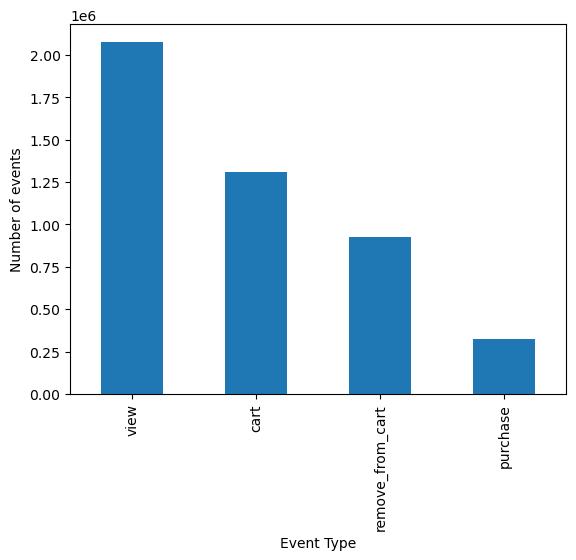

In [42]:
# Plot of the number of events of each type
event_counts = data['event_type'].value_counts()
fig, ax = plt.subplots()
event_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Event Type')
ax.set_ylabel('Number of events')
plt.show()

## Q6

In [50]:
user_1 = data[data.user_id == 439871780]

In [54]:
session_data = user_1.groupby('user_session').agg(
    user_id=('user_id', 'first'),
    num_of_events=('event_type', 'count'),
    event_time=('event_time', 'min'),
    funnel_number=('funnel_number', 'first'),
    index_in_funnel=('index_in_funnel', 'first'),
    event_duration=('duration_to_next_event', 'sum'),
    products_list=('product_id', list),
    events_list=('event_type', list),
    category_list=('category_id', list)
).reset_index()

In [55]:
def ViewedList(products, events):
    return list(pd.Series(products)[pd.Series(events) == 'view'])

def CartList(products, events):
    return list(pd.Series(products)[pd.Series(events) == 'cart'])

def PurchasedList(products, events):
    return list(pd.Series(products)[pd.Series(events) == 'purchase'])

In [56]:
session_data['list_of_viewed'] = session_data.apply(lambda x: ViewedList(x.products_list,x.events_list),axis=1)
session_data['list_of_added_to_cart'] = session_data.apply(lambda x: CartList(x.products_list,x.events_list),axis=1)
session_data['list_of_purchased'] = session_data.apply(lambda x: PurchasedList(x.products_list,x.events_list),axis=1)

In [57]:
session_data = session_data[['user_session', 'user_id', 'num_of_events', 'event_time', 'funnel_number', 'index_in_funnel', 'event_duration', 'list_of_viewed', 'list_of_added_to_cart', 'list_of_purchased']].sort_index(ascending=True)

In [58]:
session_data

,user_session,user_id,num_of_events,event_time,funnel_number,index_in_funnel,event_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1474a72b-4d80-45a2-8e2e-82f2da875af6,439871780,28,2019-11-01 01:57:30+00:00,1,3,1195.0,"[5764714, 5764714, 5888061, 5739918, 5764714, ...","[5810672, 5739918, 5759491, 5766980, 5766980, ...",[]
1,59af3484-6221-4106-9ee8-db94e2e542a4,439871780,1,2019-11-24 05:59:46+00:00,3,2,0.0,[5569528],[],[]
2,7be7ce0b-7fb5-457e-85c1-931858cfec2b,439871780,4,2019-11-07 04:28:28+00:00,2,1,4628.0,"[5739493, 5767495, 5767493]",[5767493],[]
3,7dfde513-b6bb-49d2-b1b8-4ac08c215f3f,439871780,6,2019-11-24 06:00:15+00:00,3,3,287.0,"[5569528, 5569528, 5569528, 5569528, 5569528, ...",[],[]
4,d3570657-e482-4e45-a9bc-2f55b7bf89e3,439871780,6,2019-11-01 01:44:54+00:00,1,1,704.0,"[5764714, 5764714]","[5739493, 5759491]",[]
5,ec03a020-d4d9-4ff3-b68d-1fdf3b00e06b,439871780,3,2019-11-19 07:38:37+00:00,3,1,21.0,[5739493],[],[]
6,ed6cf53d-c457-4e90-a081-cc138c41c049,439871780,1,2019-11-01 01:57:02+00:00,1,2,0.0,[5764714],[],[]
